In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/je714/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:461: UserWarning: matplotlibrc ps.usedistiller can not be set to xpdf unless xpdf-3.0 or later is installed on your system
  'your system') % pdftops_req)


# Q1
What types of Machine Learning, if any, best describe the following three scenarios:



- A coin classification system is created for a vending machine. The developers
    obtain exact coin specifications from the U.S. Mint and derive
    a statistical model of the size, weight, and denomination, which the vending
    machine then uses to classify coins.
- Instead of calling the U.S. Mint to obtain coin information, an algorithm is
    presented with a large set of labeled coins. The algorithm uses this data to
    infer decision boundaries which the vending machine then uses to classify
    its coins.
- A computer develops a strategy for playing Tic-Tac-Toe by playing repeatedly
    and adjusting its strategy by penalizing moves that eventually lead
    to losing.

[a] (i) Supervised Learning, (ii) Unsupervised Learning, (iii) Reinforcement
Learning

[b] (i) Supervised Learning, (ii) Not learning, (iii) Unsupervised Learning

[c] (i) Not learning, (ii) Reinforcement Learning, (iii) Supervised Learning

[d] (i) Not learning, (ii) Supervised Learning, (iii) Reinforcement Learning

[e] (i) Supervised Learning, (ii) Reinforcement Learning, (iii) Unsupervised
Learning

#### Answer: [d]
(i) **Not learning:** Is not using any data, it's just deriving a mathematical model for the relationship between size, weight and denomination of coins

(ii) Is using *labeled* data so it's a **supervised learning** approach

(iii) This is a **reinforcement learning** scenario with feedback on the moves.

# Q2
Which of the following problems are best suited for Machine Learning?

- (i) Classifying numbers into primes and non-primes.

- (ii) Detecting potential fraud in credit card charges.

- (iii) Determining the time it would take a falling object to hit the ground.

- (iv) Determining the optimal cycle for traffic lights in a busy intersection.

[a] (ii) and (iv)

[b] (i) and (ii)

[c] (i), (ii), and (iii)

[d] (iii)

[e] (i) and (iii)

#### Answer: [a]
(i) This problem needs a mathematical derivation because we need an exact solution to it, and we are most likely interested in understanding the mathematical underpinnings of it anyway.

(ii) This is a good problem for ML since the true mathematical basis for fraud can be very complex but we can use big amounts of historical data to create a predictive model.

(iii) This is a physics problem. It could be solved using ML to understand experimental data but the physics behind it are well understood so we can derive a mathematical model easily which will be more exact.

(iv) This is a highgly complex problem which probably depends on a lot of factors and therefore it can be difficult to find the mathematical basis of it.

# Q3
We have 2 opaque bags, each containing 2 balls. One bag has 2 black balls and
the other has a black ball and a white ball. You pick a bag at random and
then pick one of the balls in that bag at random. When you look at the ball,
it is black. You now pick the second ball from that same bag. What is the
probability that this ball is also black?

- [a] 1/4

- [b] 1/3

- [c] 1/2

- [d] 2/3

- [e] 3/4

#### Answer: [d]

In [2]:
game = {
    'bag1' : ['b', 'b'],
    'bag2' : ['b', 'w']
}
import random
black_second = 0
for i in range(0, 100000):
    bag_choice = random.choice(list(game.keys()))
    first_ball_id = random.randint(0, 1)
    if first_ball_id == 0:
        second_ball = game[bag_choice][1]
    else:
        second_ball = game[bag_choice][0]
    if second_ball == 'b':
        black_second += 1
print(black_second/100000)

0.75121


Consider a sample of 10 marbles drawn from a bin containing red and green marbles.
The probability that any marble we draw is red is µ = 0.55 (independently, with
replacement). We address the probability of getting no red marbles (ν = 0) in the
following cases:

# Q4
We draw only one such sample. Compute the probability that ν = 0. The
closest answer is (‘closest answer’ means: |your answer−given option| is closest
to 0):

- [a] $7.331 \times 10^{−6}$

- [b] $3.405 \times 10^{−4}$

- [c] $0.289$

- [d] $0.450$

- [e] $0.550$

#### Answer: [b]

The probability of getting a sample of 10 green balls is $(1 - \mu)^{10}$, so:

In [3]:
b = 3.405e-4
my_answer = pow(1-0.55, 10)
print('Difference between my answer and [b] is : %f' % abs(b - my_answer))

Difference between my answer and [b] is : 0.000000


# Q5
We draw 1,000 independent samples. Compute the probability that (at least)
one of the samples has ν = 0. The closest answer is:

- [a] $7.331 \times 10^{−6}$

- [b] $3.405 \times 10^{−4}$

- [c] $0.289$

- [d] $0.450$

- [e] $0.550$

#### Answer: [c]

In [4]:
def calcProb(x):
    return(1 - ((1 - pow(1 - x, 10)) ** 1000))

In [5]:
calcProb(0.55)

0.28863119784980995

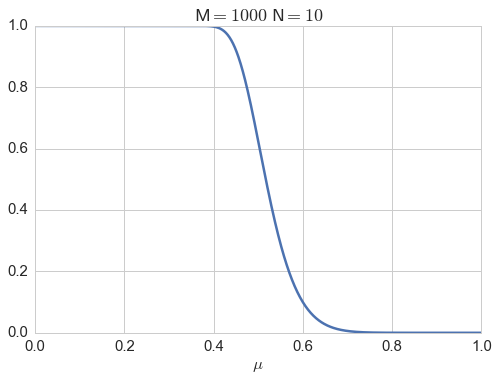

In [6]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
with sns.axes_style('whitegrid'):
    plot(np.linspace(0, 1, 1000), [calcProb(x) for x in np.linspace(0, 1, 1000)])
    xlabel('$\mu$')
    title('$\mathsf{M}=1000$ $\mathsf{N}=10$')

# The Perceptron Learning Algorithm

In this problem, you will create your own target function f and data set D to see
how the Perceptron Learning Algorithm works. Take d = 2 so you can visualize the
problem, and assume $\chi$ = [−1, 1] × [−1, 1] with uniform probability of picking each
x ∈ $\chi$ .

In each run, choose a random line in the plane as your target function f (do this by
taking two random, uniformly distributed points in [−1, 1] × [−1, 1] and taking the
line passing through them), where one side of the line maps to +1 and the other maps
to −1. Choose the inputs xn of the data set as random points (uniformly in $\mathbf{x}_n$ ), and
evaluate the target function on each xn to get the corresponding output $y_n$.

Now, in each run, use the Perceptron Learning Algorithm to find g. Start the PLA
with the weight vector $\mathbf{w}$ being all zeros (consider sign(0) = 0, so all points are initially
misclassified), and at each iteration have the algorithm choose a point randomly
from the set of misclassified points. We are interested in two quantities: the number
of iterations that PLA takes to converge to g, and the disagreement between f and
g which is $\mathbb{P}[f(\mathbf{x}) \neq g(\mathbf{x})]$ (the probability that f and g will disagree on their classification
of a random point). You can either calculate this probability exactly, or
approximate it by generating a sufficiently large, separate set of points to estimate it.
In order to get a reliable estimate for these two quantities, you should repeat the
experiment for 1000 runs (each run as specified above) and take the average over
these runs

In [345]:
import numpy as np
import random
import os
import subprocess


class Perceptron(object):

    def __init__(self, N):
        # Random linearly separated data
        xA, yA, xB, yB = [random.uniform(-1, 1) for i in range(4)]
        self.V = np.array([xB * yA - xA * yB, yB - yA, xA - xB])
        self.X = self.generate_points(N)

    def generate_points(self, N):
        X = []
        for i in range(N):
            x1, x2 = [random.uniform(-1, 1) for i in range(2)]
            x = np.array([1, x1, x2])
            s = int(np.sign(self.V.T.dot(x)))
            X.append((x, s))
        return X

    def plot(self, mispts=None, vec=None, save=False):
        fig = plt.figure(figsize=(5, 5))
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        V = self.V
        a, b = -V[1] / V[2], -V[0] / V[2]
        l = np.linspace(-1, 1)
        plt.plot(l, a * l + b, 'k-')
        cols = {1: 'r', -1: 'b'}
        for x, s in self.X:
            plt.plot(x[1], x[2], cols[s] + 'o')
        if mispts:
            for x, s in mispts:
                plt.plot(x[1], x[2], cols[s] + '.')
        if vec is not None:
            aa, bb = -vec[1] / vec[2], -vec[0] / vec[2]
            plt.plot(l, aa * l + bb, 'g-', lw=2)
        if save:
            if not mispts:
                plt.title('N = %s' % (str(len(self.X))))
            else:
                plt.title('N = %s with %s test points'
                          % (str(len(self.X)), str(len(mispts))))
            plt.savefig('p_N%s' % (str(len(self.X))),
                        dpi=200, bbox_inches='tight')

    def classification_error(self, vec, pts=None):
        # Error defined as fraction of misclassified points
        if not pts:
            pts = self.X
        M = len(pts)
        n_mispts = 0
        for x, s in pts:
            if int(np.sign(vec.T.dot(x))) != s:
                n_mispts += 1
        error = n_mispts / float(M)
        return error

    def choose_miscl_point(self, vec):
        # Choose a random point among the misclassified
        pts = self.X
        mispts = []
        for x, s in pts:
            if int(np.sign(vec.T.dot(x))) != s:
                mispts.append((x, s))
        return mispts[random.randrange(0, len(mispts))]

    def pla(self, save=False):
        # Initialize the weigths to zeros
        w = np.zeros(3)
        X, N = self.X, len(self.X)
        it = 0
        # Iterate until all points are correctly classified
        while self.classification_error(w) != 0:
            it += 1
            # Pick random misclassified point
            x, s = self.choose_miscl_point(w)
            # Update weights
            w += s * x
            if save:
                self.plot(vec=w)
                plt.title('N = %s, Iteration %s\n'
                          % (str(N), str(it)))
                plt.show()
                # plt.savefig('p_N%s_it%s' % (str(N),str(it)), \
                #            dpi=200, bbox_inches='tight')
        self.w = w

        return(it, self.estimate_disagreement(vec=self.w))



    def estimate_disagreement(self, vec, N=1000):
        error = 0
        for _ in range(N):
            x1, x2 = [random.uniform(-1, 1) for i in range(2)]
            x = np.array([1, x1, x2])
            s_f = int(np.sign(self.V.T.dot(x)))
            s_g = int(np.sign(vec.T.dot(x)))
            if s_f != s_g:
                error += 1
        return(error / N)

    def check_error(self, M, vec):
        check_pts = self.generate_points(M)
        return self.classification_error(vec, pts=check_pts)


In [338]:
p = Perceptron(10)
p.pla(print_it=False)

0.0245292

In [322]:
w = np.zeros(3)
xA, yA, xB, yB = [random.uniform(-1, 1) for i in range(4)]
V = np.array([xB * yA - xA * yB, yB - yA, xA - xB])
X = Perceptron.generate_points(p, N=10)

In [346]:
err_tot = 0
its = 0
for _ in range(1000):
    p = Perceptron(100)
    it, error = p.pla()
    err_tot += error
    its += it


In [347]:
err_tot/1000

0.013200999999999956

In [348]:
its/1000

119.067